<a href="https://colab.research.google.com/github/prabhashkumar11/Diabetes-prediction/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Predictions
- it is classification problem.
-

# Importing the required libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

# Loading the datasets

In [ ]:
df=pd.read_csv("diabetes.csv")

#Exploratory Data Analysis

**a.Understanding the dataset**
  - head of the dataset
  - shape of the dataset
  - types of columns
  - Information about dataset
  - summary of the dataset

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**b.Data Cleaning**
- dropping duplicate values
- dropping NULL values
- checking for 0 value and replacing it :- medically not possible

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
def check_zero(cols_name):
   print((df[cols_name]==0).sum(), cols_name)

check_zero("BloodPressure") 
check_zero("Glucose")
check_zero("SkinThickness")
check_zero("Insulin")
check_zero("BMI")  

35 BloodPressure
5 Glucose
227 SkinThickness
374 Insulin
11 BMI


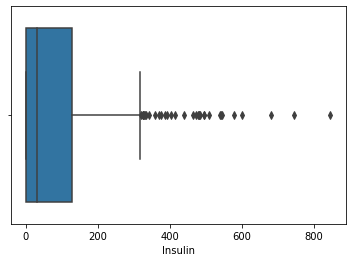

In [ ]:
import seaborn as sns
#
# Box plot
#
#sns.boxplot(df.Glucose)
#
# Distribution plot
#
sns.boxplot(df.Insulin)

In [ ]:
df['Glucose'].mean()

120.89453125

In [ ]:
df['Glucose']=df['Glucose'].replace(0,df["Glucose"].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

#skewed Distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df["BMI"]= df['BMI'].replace(0,df['BMI'].median())

# Data Visualzation
**Here we are going to plot :-**
- Count Plot - to see the dataset is balanced or not
- Histogram - to see if datais normally distributed or skewed
- Box Plot - to analyse the distribution and see the outliers
- scatter Plot - to understand the realtionship between any two variables
- pair Plot : - to create scatter plot between all the varaibles



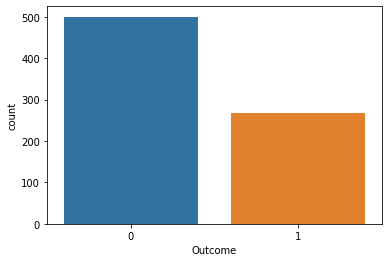

In [ ]:
sns.countplot('Outcome',data=df)

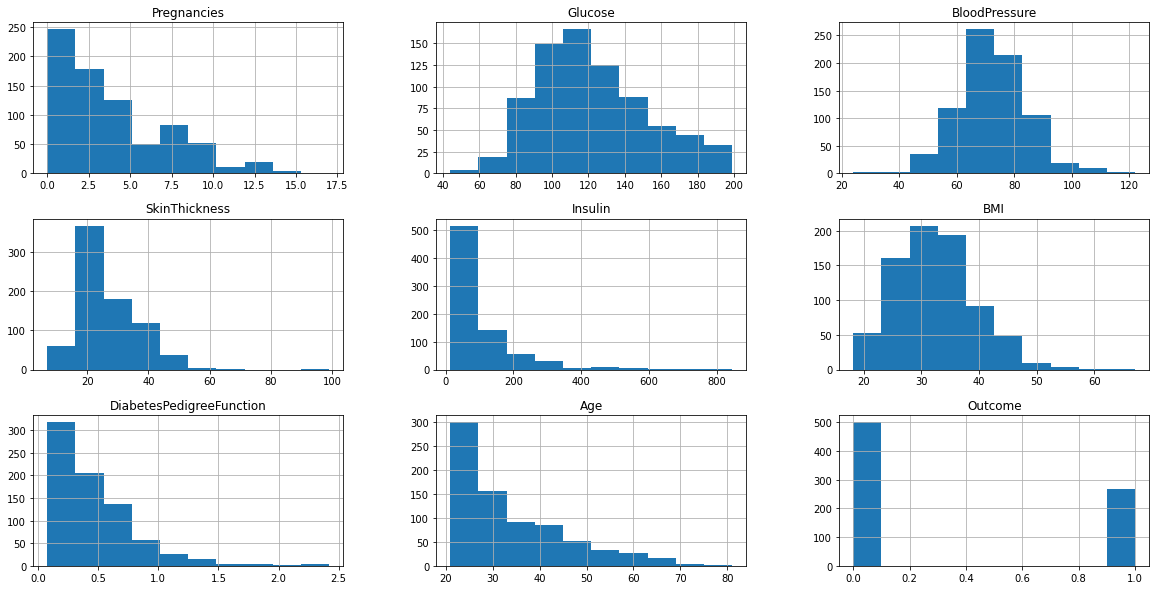

In [ ]:
#histogram for each feature
df.hist(bins=10,figsize=(20,10))
plt.show()

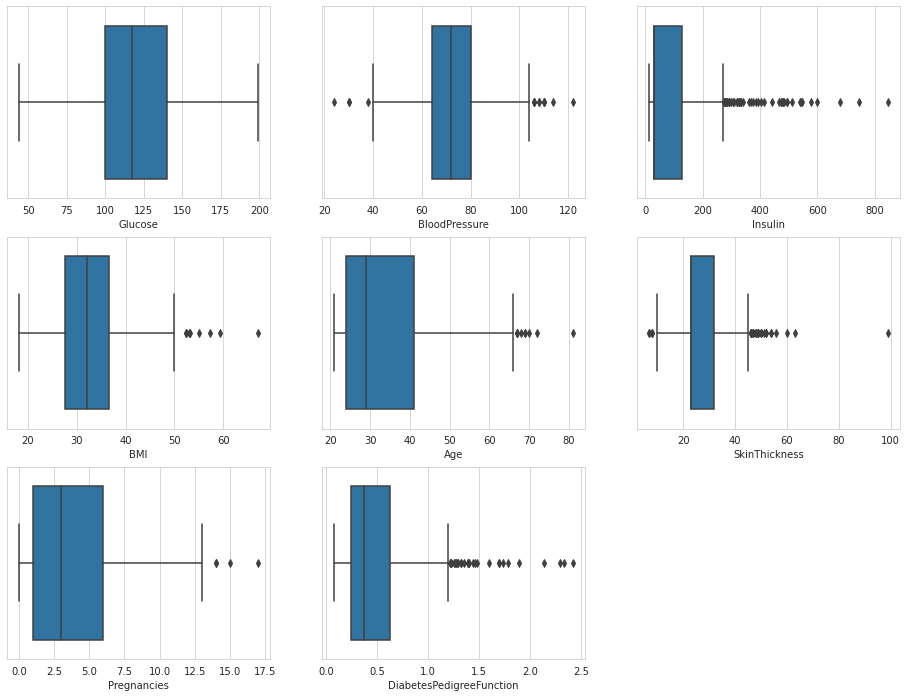

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot('Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot('BloodPressure',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

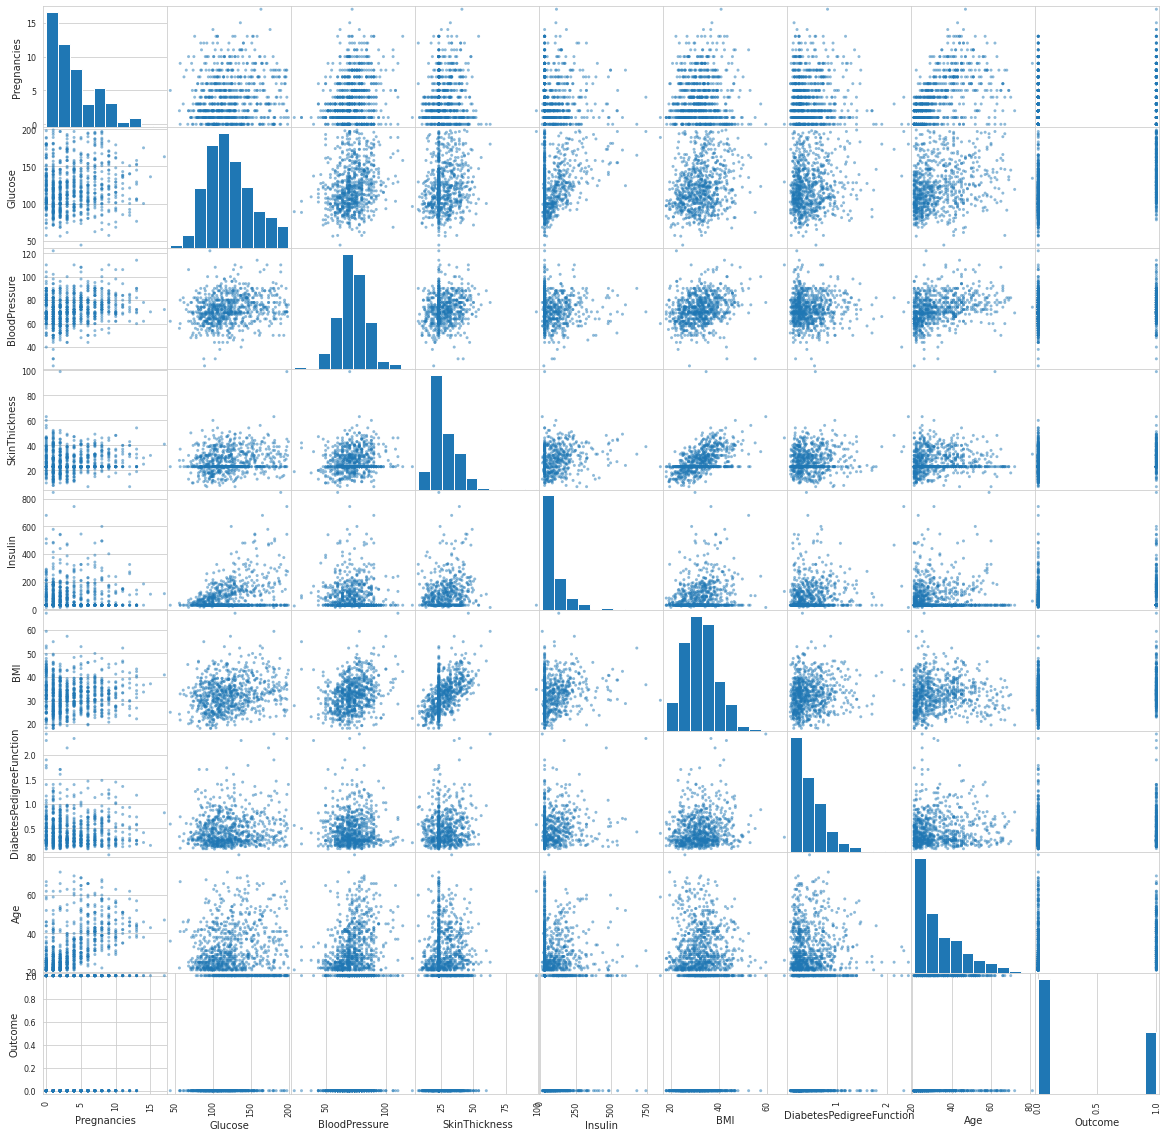

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));

# Feature Selection


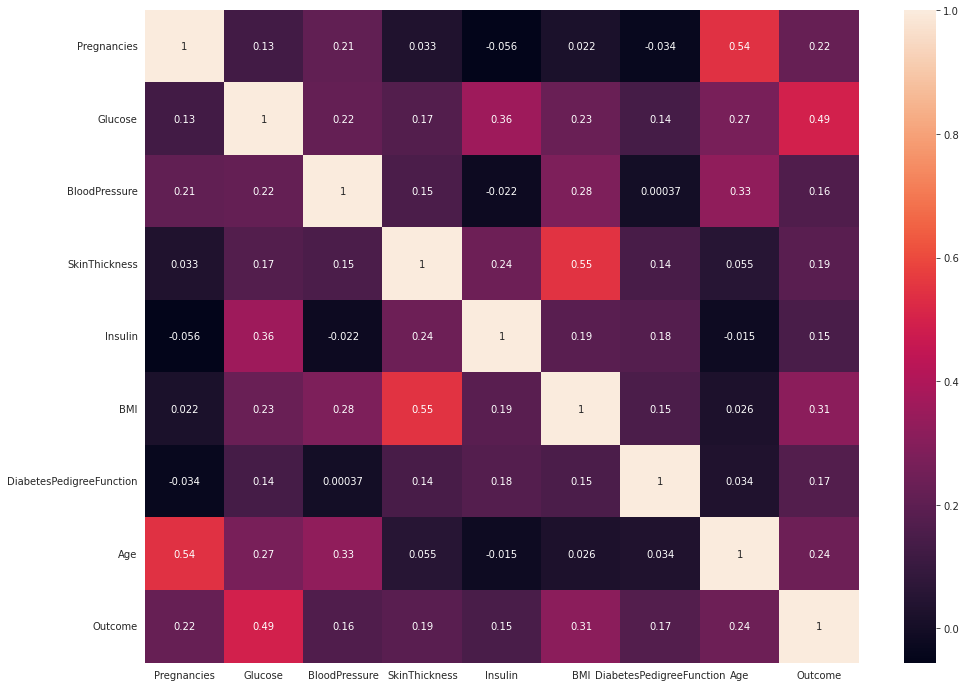

In [ ]:
plt.figure(figsize=(16,12))
cormat=df.corr()
sns.heatmap(cormat,annot=True)

In [ ]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')
df_selected

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148.0,35,33.6,50,1
1,1,85.0,29,26.6,31,0
2,8,183.0,23,23.3,32,1
3,1,89.0,23,28.1,21,0
4,0,137.0,35,43.1,33,1
...,...,...,...,...,...,...
763,10,101.0,48,32.9,63,0
764,2,122.0,27,36.8,27,0
765,5,121.0,23,26.2,30,0
766,1,126.0,23,30.1,47,1


# Handling outliers

In [ ]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile = QuantileTransformer()
X=quantile.fit_transform(x)


In [ ]:
X

array([[0.74771838, 0.81029987, 0.80182529, 0.59126467, 0.88983051,
        1.        ],
       [0.2327249 , 0.09126467, 0.64471969, 0.21316819, 0.55867014,
        0.        ],
       [0.86375489, 0.95697523, 0.35788787, 0.07757497, 0.58539765,
        1.        ],
       ...,
       [0.6779661 , 0.54954368, 0.35788787, 0.1988266 , 0.52933507,
        0.        ],
       [0.2327249 , 0.61994785, 0.35788787, 0.38591917, 0.86701434,
        1.        ],
       [0.2327249 , 0.17079531, 0.70273794, 0.39895698, 0.20013038,
        0.        ]])

In [ ]:
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns=['Pregnancies', 'Glucose' , 'SkinThickness', 'BMI', 'Age' , 'Outcome']
df_new.head(10)

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0
5,0.677966,0.483703,0.357888,0.171447,0.529335,0.0
6,0.503259,0.039765,0.735332,0.433507,0.368970,1.0
7,0.940678,0.473272,0.357888,0.691656,0.496741,0.0
8,0.387223,0.996089,0.956323,0.408083,0.919166,1.0
9,0.863755,0.604302,0.357888,0.487614,0.926336,1.0


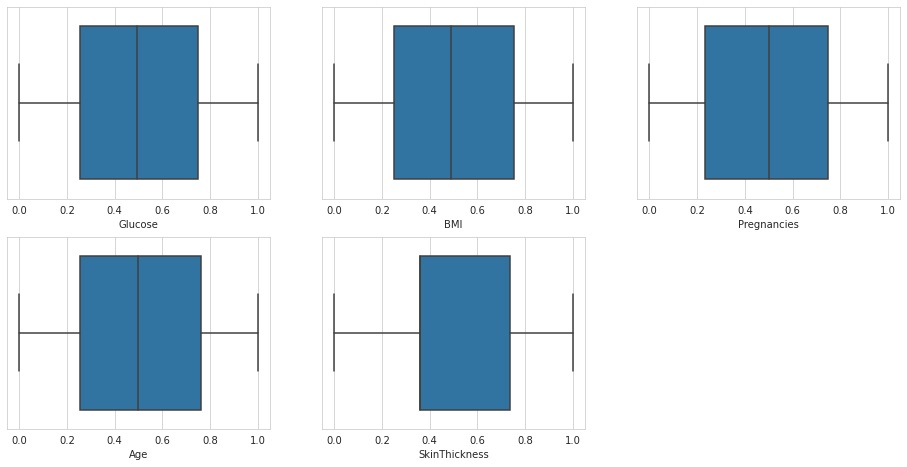

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

# Split the Data Frame into X and Y

In [ ]:
target_name='Outcome'
y=df_new[target_name]
X=df_new.drop(target_name,axis=1)

In [ ]:
X.head(10)

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258
5,0.677966,0.483703,0.357888,0.171447,0.529335
6,0.503259,0.039765,0.735332,0.433507,0.368970
7,0.940678,0.473272,0.357888,0.691656,0.496741
8,0.387223,0.996089,0.956323,0.408083,0.919166
9,0.863755,0.604302,0.357888,0.487614,0.926336


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape , y_train.shape

((614, 5), (614,))

In [ ]:
X_test.shape,y_test.shape

((154, 5), (154,))

# Classification Algorithms
- KNN
- Naive Bayes
- SVM
- Decision Tree
- Random Forest
- Logistic Regression

**This model includes the following**

**a.Hyperparameter tuning using GridSearchCV**
 - what is hyperparameter tuning
 - what is gridsearch
 - what steps to follow for hyperparameter tuning
    - 1.  Select the type of model we want to use like RandomForestClassifier,   regressor or any other model
    - 2. Check what are the parameters of the model
    - 3. Select the methods for searching the hyperparameter
    - 4. Select the cross-validation approach
    - 5. Evaluate the model using the score


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score


In [ ]:
model = SVC(kernel='linear',random_state=0)
model.fit(X_train, y_train)



SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
f1_score=f1_score(y_test,y_pred)
f1_score

0.6222222222222222

In [ ]:
# applying GridSearchCv
model=SVC()
kernel= ['poly', 'rbf' , 'sigmoid']
C = [50,10,1.0,0.1,0.01]
gamma = ['scale']

In [ ]:
grid= dict(kernel=kernel,C=C,gamma=gamma)
grid

{'C': [50, 10, 1.0, 0.1, 0.01],
 'gamma': ['scale'],
 'kernel': ['poly', 'rbf', 'sigmoid']}

In [ ]:
#define grid search
grid= dict(kernel=kernel,C=C,gamma=gamma)
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search = GridSearchCV(estimator=model,param_grid=grid,n_jobs=1,cv=cv,scoring='f1',error_score=0)

In [ ]:
grid_results=grid_search.fit(X,y)

In [ ]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
svm_pred=grid_results.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       107
         1.0       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154



**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [ ]:
reg=LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr_predict=reg.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,lr_predict))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154

